In [5]:
#"Decomment for install"
#!pip install kmeans
#!pip install seaborn

In [87]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [106]:
dataList=coojaJsonImporter("./traces")
test1BH1=dataList[0]
test1BH2=dataList[1]
testNorm =dataList[2]
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]

BlackHole=[[],[4],[5]]
for nodeList in dataList:
    data.append(createNodes(nodeList))

nodeListNorm=createNodes(testNorm)
nodeListBH1=createNodes(test1BH1)
nodeListBH2=createNodes(test1BH2)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5] 
columns=[
    "count",
    "label"
]
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
   "50%":[],
   "75%":[],
   "min":[],
   "max":[]
   #"rtt/pkt":[]
}
count=[]
labels=[]
var=[]
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j]
            name=str(j)+" "+cases[i]
            #print(name)
            #print(node.pkts['pkt'].count())
            #stats["count"]=node.pkts['pkt'].count()
            d["count"].append(data[i][j].pkts['rtt'].count())
            d["std"].append(data[i][j].pkts['rtt'].std())
            d["mean"].append(data[i][j].pkts['rtt'].mean())
            d["var"].append(data[i][j].pkts['rtt'].var())
            d["label"].append(cases[i])
            d["25%"].append(data[i][j].pkts['rtt'].describe()["25%"])
            d["50%"].append(data[i][j].pkts['rtt'].describe()["50%"])
            d["75%"].append(data[i][j].pkts['rtt'].describe()["75%"])
            d["min"].append(data[i][j].pkts['rtt'].describe()["min"])
            d["max"].append(data[i][j].pkts['rtt'].describe()["max"])
            ## d["max"].append(data[i][j].pkts['rtt']
            #var.append(data[i][j].pkts['pkt'].var())
            #stats[name]
            #stats= stats.assign(ip=pd.Series(node.pkts['pkt'].describe()).values)
            #stats.append(node.pkts['pkt'].describe())

            
            
stats=pd.DataFrame(d)            

stats
correction=[]
for el in d["label"]:
    if el=="normal":
        correction.append(1)
    else:
        correction.append(0)

correction=np.array(correction)
stats.head()

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


,label,count,std,mean,var,25%,50%,75%,min,max
0,BH1,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0
1,BH1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0
2,BH1,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0
3,BH1,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0
4,BH1,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0


In [107]:
data=stats.drop(["label","25%","std","var","75%","50%","min","max"],axis=1)

dataC=stats["label"]
print(data.head())
#Y = data[['var']]
#X = data[['std']]



   count         mean
0     98  1868.816327
1     99  2139.282828
2     91  3916.604396
3     97  1815.742268
4     25  4667.000000


In [110]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)

[1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.6666666666666666
[[12  6]
 [ 3  6]]


In [120]:
dataplus=stats.drop(["label"],axis=1)
data=dataplus
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)




[1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.8518518518518519
[[14  4]
 [ 0  9]]


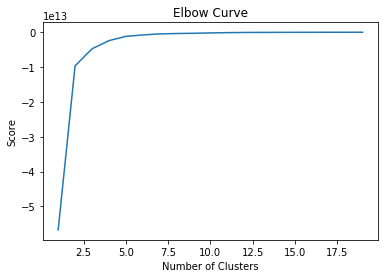

In [114]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


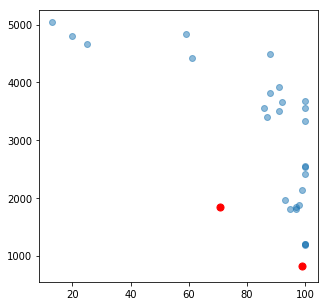

In [115]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)


plt.scatter(data['count'], data['mean'], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.show()

In [116]:
#https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
#df=np.array(X,Y)




In [117]:


X = dataplus.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

,x1,x2,labels
0,-1.906469e+05,1109.374349,BH1
1,1.124512e+06,1558.013436,BH1
2,1.350229e+06,-95.831043,BH1
3,-4.480298e+05,1021.728477,BH1
4,2.771312e+06,-69.901685,BH1


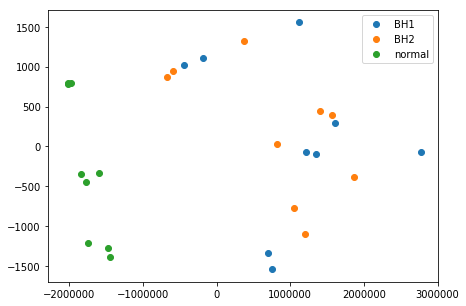

In [118]:

labels = stats['label'].unique().tolist()
plt.figure(figsize=(7,5))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab)
    plt.legend()

Experiment with 3 clusters trying also to find the black Hole node

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)

In [101]:
from sklearn.neighbors.kde import KernelDensity


